<a href="https://colab.research.google.com/github/ronupanchal/ML_Algorithm_code/blob/main/DS_medical_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Problem statement ***

We will build a Linear regression model for the Medical cost dataset.
The dataset contains age, sex, BMI(body mass
index), children, smokers, and region feature, as independent variables, and charge as a dependent variable.
We will predict individual medical costs billed
by health insurance.

***Definition & Working Principle ***
Linear Regression is Supervised learning the algorithm used when the target/dependent
the variable is continuous in real numbers.
It finds a relationship between the dependent variable y and one or more independent variable
x using the best fit line.
It works on the principle of Ordinary Least Square(OLS) or Means squared Error (MSE).

In Statistics, OLS is a method to estimate unknown parameters of the linear regression function, its goal is to minimize the sum of square differences between observed dependent
variables in the given data set and those predicted by the linear regression algorithm.

In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [1]:
!ls #check the sub folder in google drive

drive  sample_data


In [3]:
from os import getcwd
getcwd() # get working directory

'/content'

In [4]:
#Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/insurance.csv')

In [5]:
#Number of rows and columns in the dataset
print('Number of rows and columns in the data set: ',{'Rows':df.shape[0], 'columns':df.shape[1]})

Number of rows and columns in the data set:  {'Rows': 1338, 'columns': 7}


In [8]:
#Print the first five rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
#3 Check for duplicated data
duplicate=df.duplicated()
print(duplicate.sum())

1


In [10]:
#Remove the duplicated records
df.drop_duplicates(inplace=True)

In [11]:
#Now verify if there is any duplicated record left or not
dp1=df.duplicated()
print(dp1.sum())

0


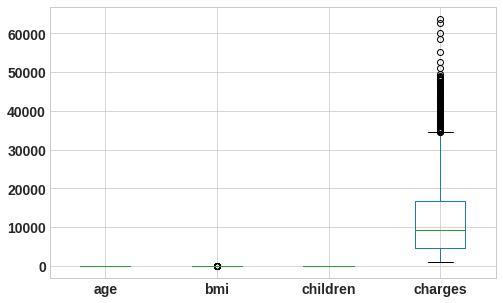

In [12]:
#Draw boxplot for Outlier Analysis
df.boxplot();

In [13]:
# Size of the DataFrame
print("No of elements in the dataframe is",df.size)

No of elements in the dataframe is 9359


In [14]:
#Print data Types of all columns
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


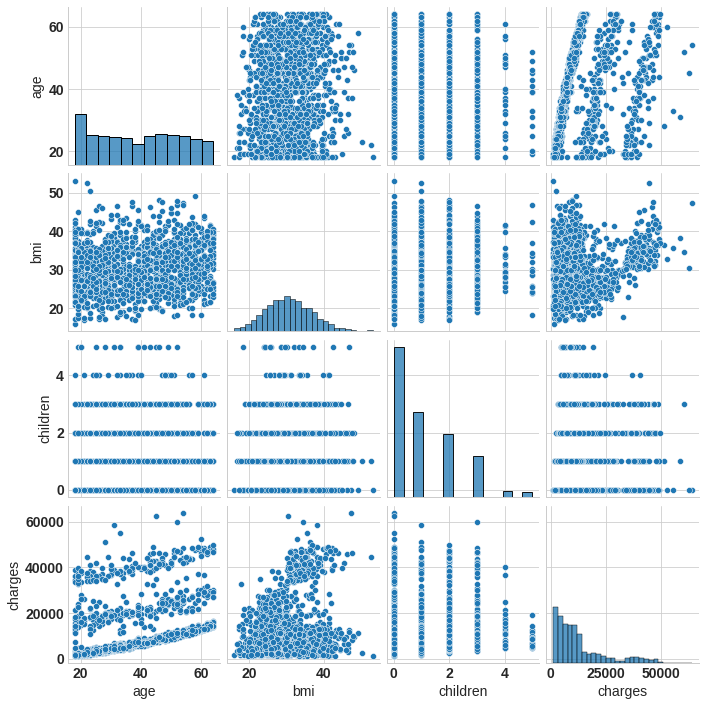

In [15]:
#Draw the pairplot for complete Dataset
sns.pairplot(df);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25b9187d50>,
      dtype=object)

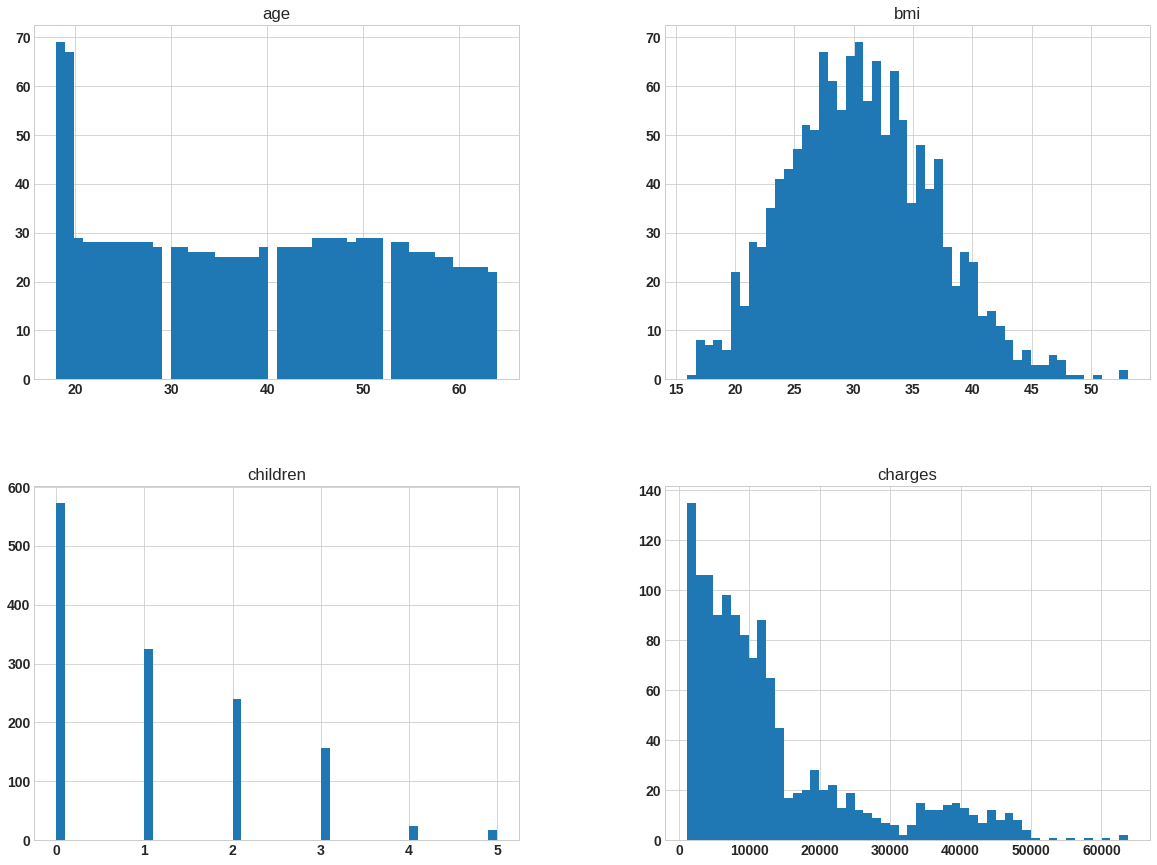

In [16]:
#Visualize the distribution of data for every feature(For plotting histogram)
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
#Conclusion: Hereafter plotting the histogram for numerical columns, we observe that ‘bmi’ is almost
#normally distributed whereas ‘charges’ are most probably to be right-skewed.

In [17]:
#Memory Usage by each of the columns 
df.memory_usage()

Index       43760
age         10696
sex         10696
bmi         10696
children    10696
smoker      10696
region      10696
charges     10696
dtype: int64

In [18]:
#Print Index of the DataFrame
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337],
           dtype='int64', length=1337)

In [19]:
#Print number of unique values per columns
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [20]:
#brief information about the dataset( coincise information about the data frame)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 115.9+ KB


In [ ]:
#Statistical measure of all the numerical columns
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#Print name of all columns present in the dataset
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
#Name for all numerical columns
num_cols=[col for col in df.columns if df[col].dtypes!='O']
num_cols

['age', 'bmi', 'children', 'charges']

In [ ]:
#Name for all categorical columns
cat_cols=[col for col in df.columns if df[col].dtypes=='O']
cat_cols

['sex', 'smoker', 'region']

In [ ]:
#Print unique values for categorical columns
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
#Finding the sum of missing values per column if present
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#Correlation values b/w numerical columns
corr_mat=df.corr()
corr_mat

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [ ]:
#Correlation of dependent column wrt independent columns
corr_mat['charges'].sort_values(ascending=False)

charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64

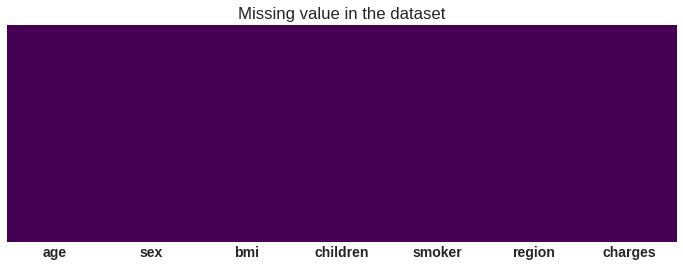

In [ ]:
#Plotting of heatmap to visualize missing values
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');
#Conclusion: There are no missing values in the dataset.

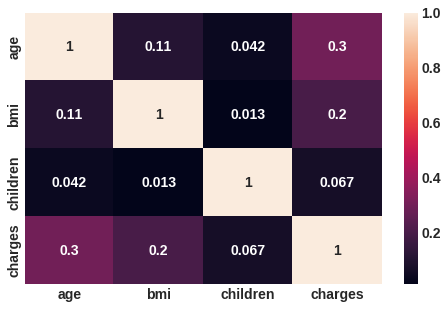

In [ ]:
#Correlation plot
sns.heatmap(df.corr(),annot= True);
# Conclusion: There is not that much correlation between independent features. So, here we do not have the problem of multicollinearity.

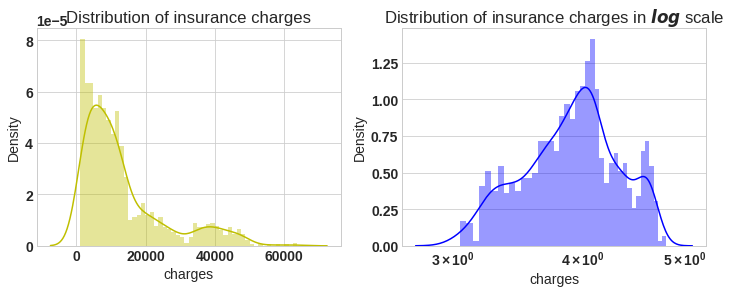

In [ ]:
#Plot the distribution of the dependent variable
import warnings
warnings.filterwarnings('ignore')
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='y',ax=ax)
ax.set_title('Distribution of insurance charges')
ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ scale')
ax.set_xscale('log');

Conclusion: If we look at the first plot the charges vary from 1120 to 63500, the plot is right-skewed. And In the second plot, we will apply a natural log,
then the plot approximately tends to normal. For further analysis, we will apply log on target variable charges.

In [ ]:
#4: Apply the pd.get_dummies() function
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_', columns = cat_cols, drop_first =True, dtype='int8')

In [ ]:
#Let’s verify the dummy variable process
print('Columns in original data frame:n',df.columns.values)
print('Number of rows and columns in the dataset:',df.shape)
print('Columns in data frame after encoding dummy variable: ',df_encode.columns.values)
print('Number of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:n ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']
Number of rows and columns in the dataset: (1337, 7)
Columns in data frame after encoding dummy variable:  ['age' 'bmi' 'children' 'charges' 'OHE_male' 'OHE_yes' 'OHE_northwest'
 'OHE_southeast' 'OHE_southwest']
Number of rows and columns in the dataset: (1337, 9)


In [ ]:
#Log transform of the dependent variable
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)
ci,lam

((-0.011576269777122257, 0.09872104960017168), 0.043516942579678274)

In [ ]:
# Log transform
df_encode['charges'] = np.log(df_encode['charges'])

In [ ]:
#5 Splitting of Data into Training and Test Subset
from sklearn.model_selection import train_test_split
# Independent variables(predictor)
X = df_encode.drop('charges',axis=1)
# dependent variable(response)
y = df_encode['charges'] 
# Now, split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
# Model Building
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]
# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [ ]:
parameter_df.head()

,Parameter,Columns,theta
0,theta_0,intersect:x_0=1,7.108890
1,theta_1,age,0.033717
2,theta_2,bmi,0.011777
3,theta_3,children,0.093812
4,theta_4,OHE_male,-0.072293


In [ ]:
# cikit Learn module( # Note: x0 =1 is no need to add, sklearn will take care of it.)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True,normalize=False)
lin_reg.fit(X_train,y_train)
#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.108890,7.108890
1,theta_1,age,0.033717,0.033717
2,theta_2,bmi,0.011777,0.011777
3,theta_3,children,0.093812,0.093812
4,theta_4,OHE_male,-0.072293,-0.072293
5,theta_5,OHE_yes,1.548322,1.548322
6,theta_6,OHE_northwest,-0.041579,-0.041579
7,theta_7,OHE_southeast,-0.128679,-0.128679
8,theta_8,OHE_southwest,-0.121734,-0.121734


In [ ]:
# 7 Model Evaluation
#Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)
#Evaluation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]
# R_square calculation
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)


In [ ]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)
#Evaluation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)
# R_square
R_square_sk = lin_reg.score(X_test,y_test)

In [ ]:
# 8: Predictions on Test Dataset
print(y_pred_norm)

[ 9.19581922  8.78324693 10.27935359  8.06253984  9.33383184  9.73408752
  8.51205619  8.56436199  9.57743662 10.88945873  8.09995468  9.54266702
  9.01822867  9.50030208  8.42638302  7.79928355  8.71935034  8.11850885
 10.46717634 10.38049549 11.18527156 10.9572005   8.60275414  9.23954781
  7.95119302  8.77379887  8.53283261  9.61920264  7.96465238  7.89186376
  8.45697982  8.76448499  8.38453732  9.44201569  9.3217338   9.85256027
  9.25736969  9.59639281  9.16723991  8.32751353  9.23021098  9.10552932
  8.85410987 10.51788534  8.38970105  9.26575664  8.42413867  7.97916441
 10.29953495  8.63465845  9.46866078  8.79139798  7.96580405  9.32742421
  8.38970676 10.53903398  9.27765958  8.96527075  9.83236368  8.07073907
  9.97231636  9.02629528  7.92032572  9.11649854  8.16241749  8.05609897
  8.03796173  8.77366064  8.41065398  9.22790149  8.7526425  10.53151303
  8.95369724 10.64328527  8.05234765  8.47407455  9.41575754  8.94595175
  9.31465971  8.45861646  9.45926335  8.08611194  9

In [ ]:
print(y_pred_sk)

[ 9.19581922  8.78324693 10.27935359  8.06253984  9.33383184  9.73408752
  8.51205619  8.56436199  9.57743662 10.88945873  8.09995468  9.54266702
  9.01822867  9.50030208  8.42638302  7.79928355  8.71935034  8.11850885
 10.46717634 10.38049549 11.18527156 10.9572005   8.60275414  9.23954781
  7.95119302  8.77379887  8.53283261  9.61920264  7.96465238  7.89186376
  8.45697982  8.76448499  8.38453732  9.44201569  9.3217338   9.85256027
  9.25736969  9.59639281  9.16723991  8.32751353  9.23021098  9.10552932
  8.85410987 10.51788534  8.38970105  9.26575664  8.42413867  7.97916441
 10.29953495  8.63465845  9.46866078  8.79139798  7.96580405  9.32742421
  8.38970676 10.53903398  9.27765958  8.96527075  9.83236368  8.07073907
  9.97231636  9.02629528  7.92032572  9.11649854  8.16241749  8.05609897
  8.03796173  8.77366064  8.41065398  9.22790149  8.7526425  10.53151303
  8.95369724 10.64328527  8.05234765  8.47407455  9.41575754  8.94595175
  9.31465971  8.45861646  9.45926335  8.08611194  9

In [ ]:
# 9: Finding Evaluation Metrics
# Mean Squared Error for Model using Normal Equation
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)

The Mean Square Error(MSE) or J(theta) is:  0.1902673956042834


In [ ]:
# R-Squared  for Model using the Normal Equation
print('The R_2 score by using the normal equation is: ',R_square)

The R_2 score by using the normal equation is:  0.7859089625628083


In [ ]:
# Mean Squared Error for Model using Sklearn Library
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)

The Mean Square Error(MSE) or J(theta) is:  0.19026739560428188


In [ ]:
# R-Squared for Model using Sklearn Library
print('The R_2 score by using the sklearn library is: ',R_square_sk)

The R_2 score by using the sklearn library is:  0.78590896256281


Text(0.5, 1.0, 'Check for Linearity:n Actual Vs Predicted value')

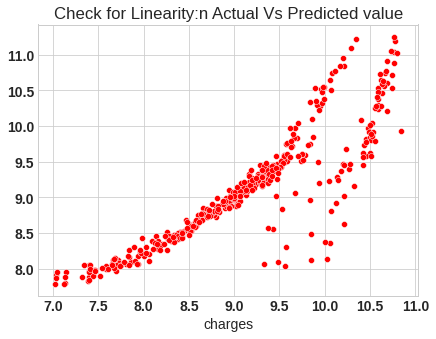

In [ ]:
# 10: Model Validation
#Check for Linearity
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:n Actual Vs Predicted value')

In [ ]:
#Check for Residual normality & mean

ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: n Residual eror');

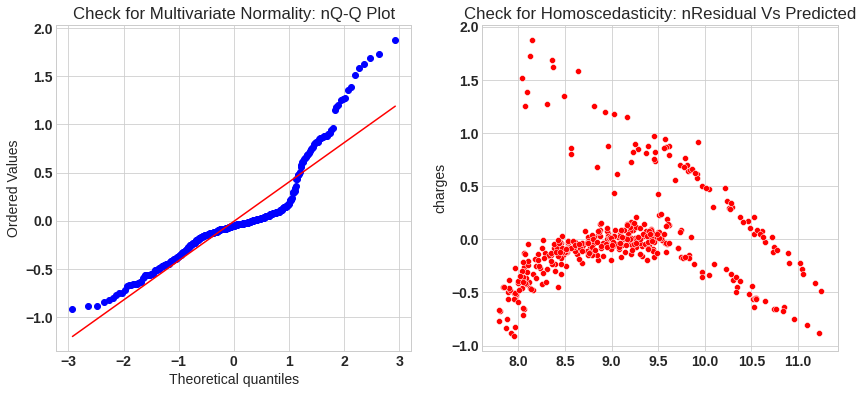

In [ ]:
#Check for Multivariate Normality

# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: nQ-Q Plot')
#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: nResidual Vs Predicted');

In [ ]:
# Check for Multicollinearity

#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.670910150983689

**Conclusion:**
The model assumption linear regression as follows:

In our model, the actual vs predicted plot is curved so the linear assumption fails.
The residual mean is zero and the residual error plot is right-skewed.
Q-Q plot shows as the value log value greater than 1.5 trends to increase.
The plot exhibits heteroscedastic error and will increase after a certain point.
Variance inflation factor value is less than 5, so no multicollinearity.